In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot_function(f,tmin,tmax,tlabel=None,xlabel=None,axes=False, **kwargs):
    ts = np.linspace(tmin,tmax,1000)
    if tlabel:
        plt.xlabel(tlabel,fontsize=18)
    if xlabel:
        plt.ylabel(xlabel,fontsize=18)
    plt.plot(ts, [f(t) for t in ts], **kwargs)
    if axes:
        total_t = tmax-tmin
        plt.plot([tmin-total_t/10,tmax+total_t/10],[0,0],c='k',linewidth=1)
        plt.xlim(tmin-total_t/10,tmax+total_t/10)
        xmin, xmax = plt.ylim()
        plt.plot([0,0],[xmin,xmax],c='k',linewidth=1)
        plt.ylim(xmin,xmax)

In [3]:
def plot_volume(f,tmin,tmax,axes=False,**kwargs):
    plot_function(f,tmin,tmax,tlabel="time (hr)", xlabel="volume (bbl)", axes=axes, **kwargs)

def plot_flow_rate(f,tmin,tmax,axes=False,**kwargs):
    plot_function(f,tmin,tmax,tlabel="time (hr)", xlabel="flow rate (bbl/hr)", axes=axes, **kwargs)

In [4]:
def volume(t):
    return (t-4)**3 / 64 + 3.3

def flow_rate(t):
    return 3*(t-4)**2 / 64

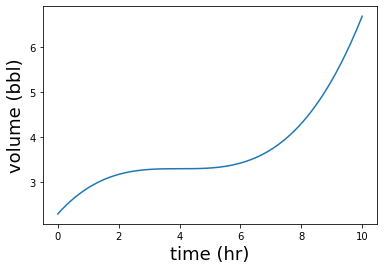

In [5]:
plot_volume(volume,0,10)

In [6]:
def average_flow_rate(v,t1,t2):
    return (v(t2)-v(t1))/(t2-t1)

In [7]:
volume(4)

3.3

In [8]:
volume(9)

5.253125

In [9]:
average_flow_rate(volume,4,9)

0.390625

In [10]:
def decreasing_volume(t):
    if t < 5:
        return 10 - (t**2)/5
    else:
        return 0.2*(10-t)**2

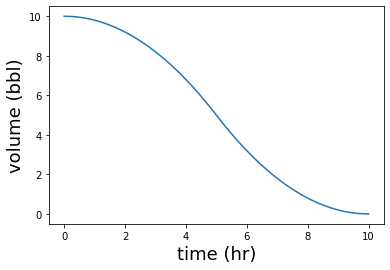

In [11]:
plot_volume(decreasing_volume,0,10)

In [12]:
average_flow_rate(decreasing_volume,0,4)

-0.8

In [13]:
def secant_line(f,x1,x2):
    def line(x):
        return f(x1)+(x-x1)*(f(x2)-f(x1))/(x2-x1)
    return line

In [14]:
def plot_secant(f,x1,x2,color='k'):
    line=secant_line(f,x1,x2)
    plot_function(line,x1,x2,c=color)
    plt.scatter([x1,x2],[f(x1),f(x2)],c=color)

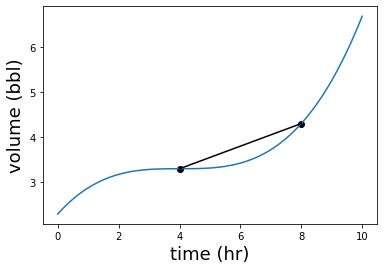

In [15]:
plot_volume(volume,0,10)
plot_secant(volume,4,8)

In [16]:
np.arange(0,10,0.5)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [17]:
def interval_flow_rates(v,t1,t2,dt):
    return [(t,average_flow_rate(v,t,t+dt)) for t in np.arange(t1,t2,dt)]

In [19]:
interval_flow_rates(volume,0,10,1)

[(0, 0.578125),
 (1, 0.296875),
 (2, 0.109375),
 (3, 0.015625),
 (4, 0.015625),
 (5, 0.109375),
 (6, 0.296875),
 (7, 0.578125),
 (8, 0.953125),
 (9, 1.421875)]

In [20]:
def plot_interval_flow_rates(volume,t1,t2,dt):
    series=interval_flow_rates(volume,t1,t2,dt)
    times=[t for (t,_) in series]
    rates=[q for (_,q) in series]
    plt.scatter(times,rates)

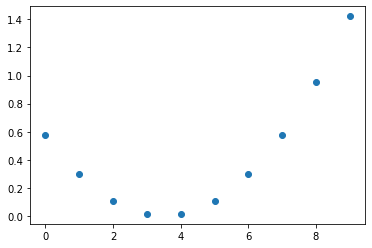

In [21]:
plot_interval_flow_rates(volume,0,10,1)

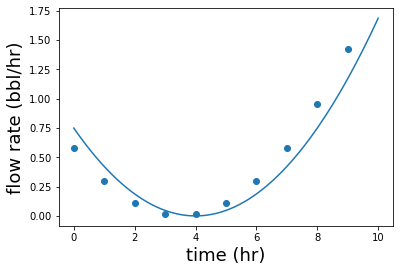

In [22]:
plot_flow_rate(flow_rate,0,10)
plot_interval_flow_rates(volume,0,10,1)

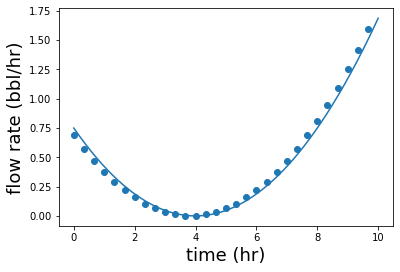

In [25]:
plot_flow_rate(flow_rate,0,10)
plot_interval_flow_rates(volume,0,10,1/3)

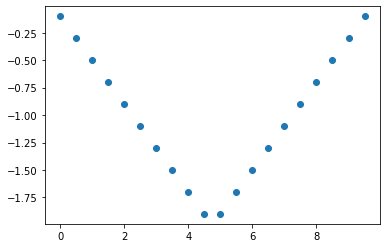

In [26]:
plot_interval_flow_rates(decreasing_volume,0,10,0.5)

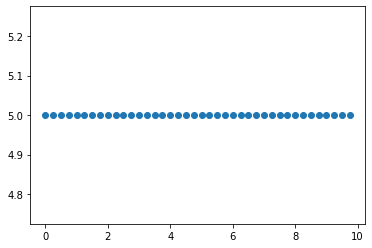

In [28]:
def linear_volume_functiion(t):
    return 5*t+3
plot_interval_flow_rates(linear_volume_functiion,0,10,0.25)

In [30]:
average_flow_rate(volume,0.5,1.5)

0.42578125

In [31]:
average_flow_rate(volume,0.9,1.1)

0.4220312499999988

In [32]:
average_flow_rate(volume,0.99,1.01)

0.42187656249998945

In [33]:
average_flow_rate(volume,0.999,1.001)

0.42187501562509583

In [34]:
average_flow_rate(volume,0.9999,1.0001)

0.42187500015393936

In [35]:
average_flow_rate(volume,0.99999,1.00001)

0.4218750000002602

In [36]:
flow_rate(1)

0.421875

In [39]:
def instantaneous_flow_rate(v,t,digits=6):
    tolerance=10**(-digits)
    h=1
    approx=average_flow_rate(v,t-h,t+h)
    for i in range(0,2*digits):
        h=h/10
        next_approx=average_flow_rate(v,t-h,t+h)
        if abs(next_approx-approx)<tolerance:
            return round(next_approx,digits)
        else:
            approx=next_approx
    raise Exception("Derivate did not converage")

In [40]:
instantaneous_flow_rate(volume,1)

0.421875

In [41]:
def get_flow_rate_function(v):
    def flow_rate_function(t):
        instantaneous_flow_rate(v,t)
    return flow_rate_function

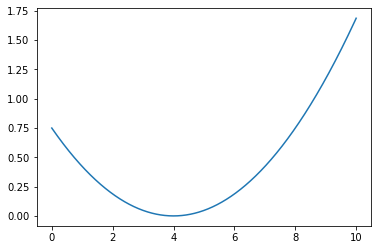

In [42]:
plot_function(flow_rate,0,10)
plot_function(get_flow_rate_function(volume),0,10)